HCP:
c~sqrt(8/3)a=1.633a, alpha=90, beta=90, gamma=120
-----------------
ori_hkl = [0, 0, 1], spacegroup = HCP
(a,b,c)=(10.00, 10.00, 16.00) A, (alp,beta,gam)=(90.00, 90.00, 120.00) deg
./xray_data/SMI/q_map_SMI_example_waxs.tiff


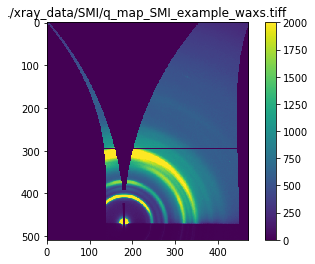

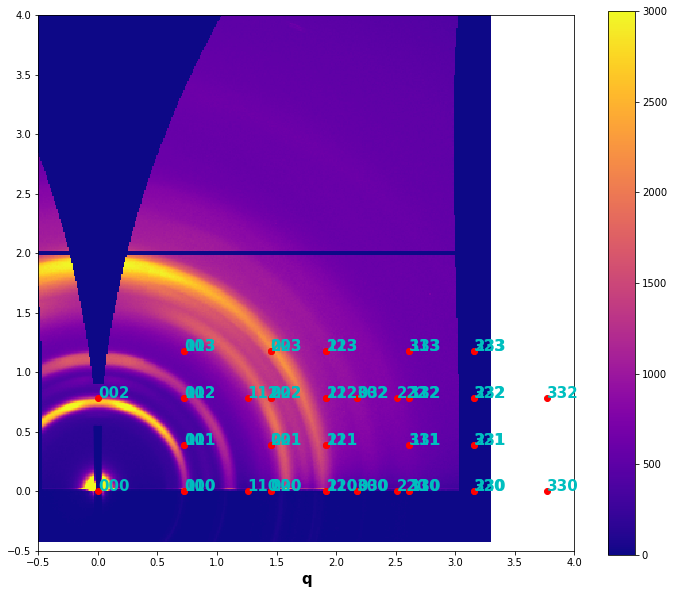

,d,hkl,q,q_ratio
0,10.000000,000,0.628319,1.000000
2,8.660254,010,0.725520,1.154701
12,8.660254,100,0.725520,1.154701
1,8.164966,002,0.769530,1.224745
3,7.650921,011,0.821233,1.307032
13,7.650921,101,0.821233,1.307032
14,5.940885,102,1.057618,1.683251
4,5.940885,012,1.057618,1.683251
16,5.000000,110,1.256637,2.000000
15,4.608572,103,1.363369,2.169869


In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import fabio
from random import *
from fun_index import *

# Ruipeng Li, Esther Tsai
# 2019
#
# Ref
# http://lampx.tugraz.at/~hadley/ss1/crystalstructure/structures/hcp/hcp.php
# http://www.cryst.ehu.es/cgi-bin/cryst/programs/nph-hkl?gnum=194

## INPUT parameters
param_beam = {
    "geometry": 'GI', # Specify GI or Transmission
    "lambda_A": 1,    # (Currently unused)
    "inc_theta_deg": [0.12, 0.1, 0.15], # (Currently unused) [Inci, Inci_c, Inci_s]
    "verbose": 1
}
param = {
    "a": 10,
    "b": 10,
    "c": 16, 
    "alp_deg": 90,
    "beta_deg": 90,
    "gam_deg": 120, 
    "spacegroup": 'HCP', # 194(HCP), 225(FCC), 229(BCC), 62(pnma) # See fun_index.py -> check_ref(h, k, l, spacegroup)
    "ori_hkl": [0, 0, 1],  # Beam direction if Transmission, normal to film if GI
    "range_hkl": [[0, 3], [0, 3], [0, 3]],
    "filename": './xray_data/SMI/q_map_SMI_example_waxs.tiff', # SMI (png or tiff); CMS (png or npz)
    #"filename": './xray_data/CMS/CMS_example_waxs.png.npz',
}
data = []
    
get_hint(param['spacegroup'])

## Index
hkl_list, Qxy_list, Qz_list, q_data = get_index(**param,**param_beam)


## Load and plot data
%matplotlib inline 
if 'filename' in param:
    fn = param['filename']
    if fn.find('tiff')>0 or fn.find('.npz')>0:
        data = load_data(fn)
        
    if fn.find('.tiff')>0:
        temp = fabio.open(fn)
        plt.figure()
        plt.imshow(temp.data, vmin=0, vmax=2000)
        plt.colorbar(); plt.title(fn)
    elif fn.find('png')>0 and fn.find('.npz')<0:        
        img = mpimg.imread(fn)
        plt.figure()
        plt.imshow(img); plt.title(fn)

        
## Plot index
param_plot = {
    "log10": 0,
    "lim1": [-0.5, 4],  # axis limits
    #"vmin": 0,  # colorbar range
    "vmax": 3000,
    "textcolor": 'c',
}
plt.figure(figsize=(12,10))
plot_index(data, Qxy_list, Qz_list, hkl_list, **param_plot) 


## List peaks (d = 2pi/q)
q_data.sort_values(by=['q'], ascending=True)
